# Création d'un dataset pytorch

Pour créer un dataset pytorch, il faut créer une classe héritant de la classe __torch.utils.data.Dataset__ et redéfinir les methodes __len__ et __getitem__ qui permettent respectivement de connaitre le nombre d'éléments dans le dataset et de renvoyer l'exemple et la cible correspondant à un index donné.


Ici nous allons créer un dataset pytorch qui à partir de données temporelles (le cours du bitcoin echantilloné sur 1000 minutes avec un intervalle de temps entre chaque mesures de 1 minute) renvois deux tenseurs pytorch. Le premier correspond à une observation de N (obs_size) points successifs et le second aux k (tgt_size) points suivants. Ces deux tenseurs sort normalisés par rapport à l'observation (le premier tenseur).

In [23]:
#import de la classe abstraite Dataset
from torch.utils.data import Dataset

import numpy as np
import torch

In [24]:
#création de la classe MyDataSet héritant de la classe torch.utils.data.Dataset

class MyDataSet(Dataset):
    
    '''
    Dataset pytorch
    
    params:
        obs_size : int
        tgt_size : int
    
    '''
    
    def __init__(self,obs_size,tgt_size):
        
        self.obs_size = obs_size
        self.tgt_size = tgt_size
        self.data = np.loadtxt('data.csv')[:,1] #on ne selectionne que la valeur, pas le temps.
        
        self.size = len(self.data) - self.obs_size - self.tgt_size #on tiens compte de la taille de l'observation et de la cible
        
    #redefinition de la méthode __len__
    def __len__(self):
        
        return self.size
        
    #redefinition de la méthode __getitem__
    def __getitem__(self,idx):
        
        observation = np.copy(self.data[idx:idx + self.obs_size])
        target = np.copy(self.data[idx + self.obs_size:idx + self.obs_size + self.tgt_size])
        
        #normalisation des données:
        
        mean = observation.mean() # calcul de la moyenne
        std = observation.std() # clalcul de la déviation standard
        
        target = (target - mean)/std #normalisation de la cible
        observation = (observation - mean)/std #normalisation de l'observation
        
        return torch.tensor(observation).float(), torch.tensor(target).float() #conversion en tenseurs pytorch
        
        

## Test du Dataset

In [25]:
import matplotlib.pyplot as plt

In [26]:
dataset = MyDataSet(10,5)

In [35]:
print(len(dataset))

985


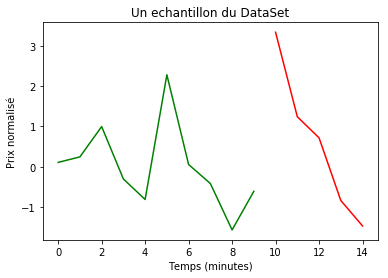

In [28]:
#affichage d'une observation et d'une cible:

x1 = list(range(10))
x2 = list(range(10,15))

y1,y2 = dataset[10]

plt.title('Un echantillon du DataSet')
plt.ylabel('Prix normalisé')
plt.xlabel('Temps (minutes)')

plt.plot(x1,y1,'g')
plt.plot(x2,y2,'r')